<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v3/v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # podjela podataka na skup za treniranje i testiranje
from sklearn.preprocessing import StandardScaler # skaliranje podataka: standardizacija
from sklearn.linear_model import LinearRegression # model linearne regresije
from sklearn import metrics

In [9]:
housing_df = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Imamo nedostajuće vrijednosti koje ću zamijeniti medijanom.

In [11]:
housing_df['total_bedrooms'] = housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median())

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Sada imamo sve podatke.

In [18]:
housing_numerical = housing_df.select_dtypes(include='number')
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


<Axes: >

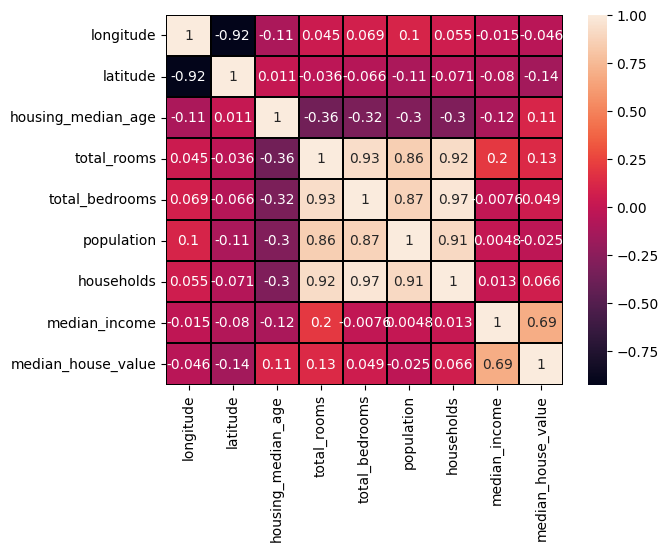

In [24]:
housing_correlation_matrix = housing_numerical.corr(method='pearson')
sns.heatmap(data=housing_correlation_matrix, annot=True, linewidths=0.1, linecolor="black")

In [63]:
housing_df_chosen_num = housing_correlation_matrix['median_house_value'].sort_values(ascending=False)[0:4]
housing_df_chosen_num.axes

[Index(['median_house_value', 'median_income', 'total_rooms',
        'housing_median_age'],
       dtype='object')]

In [57]:
print(housing_df['ocean_proximity'].unique())

ocean_proximity_mapping = {'NEAR BAY' : 1, '<1H OCEAN' : 2, 'INLAND' : 3, 'NEAR OCEAN' : 4,  'ISLAND' : 5}

housing_df['ocean_proximity_mapped'] = housing_df['ocean_proximity'].map(ocean_proximity_mapping)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [64]:
x_train_model_1, x_test_model_1 = train_test_split(housing_df[['median_house_value', 'median_income', 'total_rooms',
        'housing_median_age']], train_size=0.85, random_state=7)
y_train_1 = x_train_model_1['median_house_value']
y_test_1 = x_test_model_1['median_house_value']

x_train_model_1.drop(['median_house_value'], axis=1, inplace=True)
x_test_model_1.drop(['median_house_value'], axis=1, inplace=True)

print("Skup za treniranje:", x_train_model_1.shape)
print("Skup za testiranje:", x_test_model_1.shape)


Skup za treniranje: (17544, 3)
Skup za testiranje: (3096, 3)


In [65]:
scaler = StandardScaler()
x_train_model_1 = scaler.fit_transform(x_train_model_1)
x_test_model_1 = scaler.transform(x_test_model_1)
x_train_model_1

array([[ 0.16354327, -0.4453616 ,  0.74207974],
       [-0.39385736, -0.04954087,  0.90100365],
       [ 0.0549103 , -0.76850855,  1.85454713],
       ...,
       [ 0.32691298, -0.79593262,  1.05992757],
       [ 3.79019321, -0.63961542,  0.74207974],
       [-0.22402641,  0.20733124, -0.13200178]])

In [67]:
model = LinearRegression()
model.fit(x_train_model_1, y_train_1)

LinearRegression()

In [68]:
print(model.intercept_)
print(model.coef_)

206280.7864797082
[80788.5127243   8528.41294875 24728.43361639]


In [70]:
y_pred_test = model.predict(x_test_model_1)

In [72]:
def evaluate_regression(y, y_pred):
  print('MAE: {:.3f}'.format(metrics.mean_absolute_error(y, y_pred)))
  print('MSE: {:.3f}'.format(metrics.mean_squared_error(y, y_pred)))
  print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred))))
  print('Koeficijent determinacije: {:.3f}'.format(metrics.r2_score(y, y_pred)))

In [73]:
evaluate_regression(y_test_1, y_pred_test)

MAE: 60719.044
MSE: 6569778222.096
RMSE: 81054.168
Koeficijent determinacije: 0.510


In [74]:
x_train_model_2, x_test_model_2 = train_test_split(housing_df, train_size=0.85, random_state=7)
y_train_2 = x_train_model_2['median_house_value']
y_test_2 = x_test_model_2['median_house_value']

x_train_model_2.drop(['median_house_value', 'ocean_proximity'], axis=1, inplace=True)
x_test_model_2.drop(['median_house_value', 'ocean_proximity'], axis=1, inplace=True)

print("Skup za treniranje:", x_train_model_2.shape)
print("Skup za testiranje:", x_test_model_2.shape)

Skup za treniranje: (17544, 9)
Skup za testiranje: (3096, 9)


In [75]:
scaler = StandardScaler()
x_train_model_2 = scaler.fit_transform(x_train_model_2)
x_test_model_2 = scaler.transform(x_test_model_2)
x_train_model_2

array([[ 0.73525522, -0.78522676,  0.74207974, ..., -0.49578561,
         0.16354327, -0.5392862 ],
       [ 1.27414886, -1.34666647,  0.90100365, ..., -0.07707425,
        -0.39385736, -0.5392862 ],
       [-1.34048327,  1.03009499,  1.85454713, ..., -0.78446238,
         0.0549103 , -1.71328261],
       ...,
       [ 0.65541912, -0.65422416,  1.05992757, ..., -0.779261  ,
         0.32691298, -0.5392862 ],
       [ 0.83006058, -0.94898001,  0.74207974, ..., -0.85468106,
         3.79019321, -0.5392862 ],
       [-1.37541156,  0.90377105, -0.13200178, ...,  1.0308204 ,
        -0.22402641,  1.80870663]])

In [76]:
model = LinearRegression()
model.fit(x_train_model_2, y_train_2)

LinearRegression()

In [77]:
print(model.intercept_)
print(model.coef_)

206280.7864797084
[-83446.28921378 -88976.34254621  14018.04489761 -15175.98944535
  33610.87204589 -44886.25311887  31024.12457365  75538.96607354
  -2088.18247923]


In [79]:
y_pred_test = model.predict(x_test_model_2)

In [80]:
evaluate_regression(y_test_2, y_pred_test)

MAE: 51491.113
MSE: 4871948578.938
RMSE: 69799.345
Koeficijent determinacije: 0.637
